In [8]:
### Diversity analysis ###

# "estimateAbundance" function infers a complete clonal abundance distribution.
# "alphaDiversity" function generate a smooth diversity (D) curve is generated over a range of diversity orders (q).
# also test the diverstiy (D) at a fixed diversity order (q).

# Load required packages
library(alakazam)
library(dplyr)
library(scales)
library(ggplot2)

### If I run IgG only file, there is almost no diversity to see.
db <- readChangeoDb("wt_r_NO_igM.tsv", select = NULL, drop = NULL, seq_upper = TRUE)

In [9]:
# Partitions the data based on the sample column
clones <- countClones(db, group=c("sample_id", "c_call"), clone="clone_id")
head(clones, 5)

sample_id,c_call,clone_id,seq_count,seq_freq
<chr>,<chr>,<chr>,<int>,<dbl>
r,IGHG2C,590_58,25,0.27777778
r,IGHG2C,398_19,6,0.06666667
r,IGHG2B,742_378,3,0.11111111
r,IGHG2C,224_114,3,0.03333333
r,IGHG2C,285_32,3,0.03333333


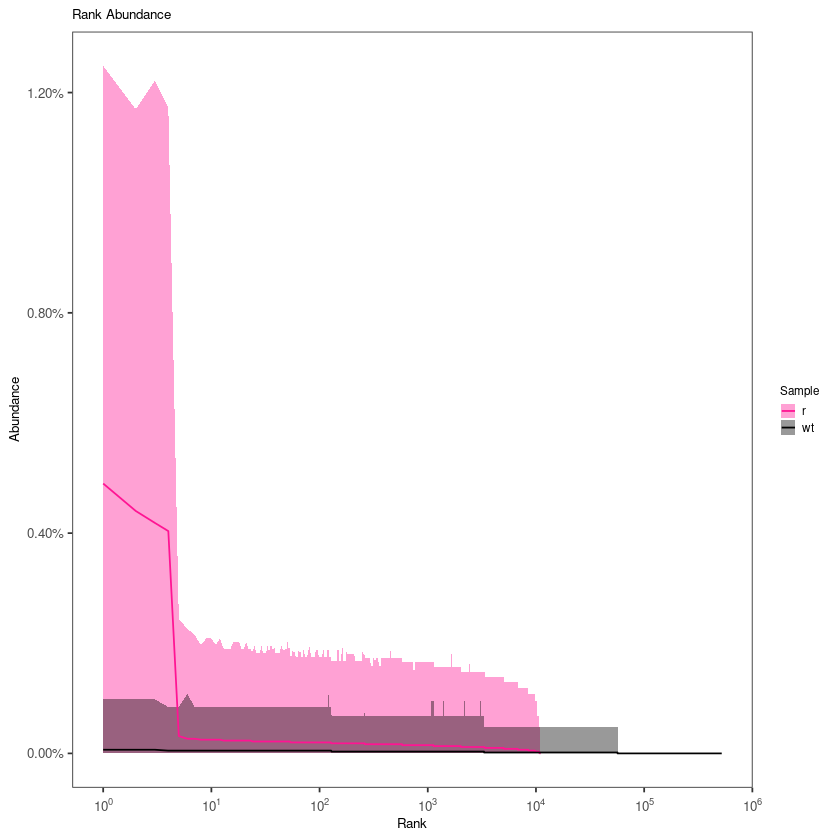

In [10]:
# Partitions the data on the sample column
# Calculates a 95% confidence interval via 200 bootstrap realizations
curve <- estimateAbundance(clones, group="sample_id", ci=0.95, nboot=200, clone="clone_id")

# Plots a rank abundance curve of the relative clonal abundances
sample_colors <- c("r"="deeppink1", "wt"="black")
plot(curve, colors = sample_colors, legend_title="Sample")

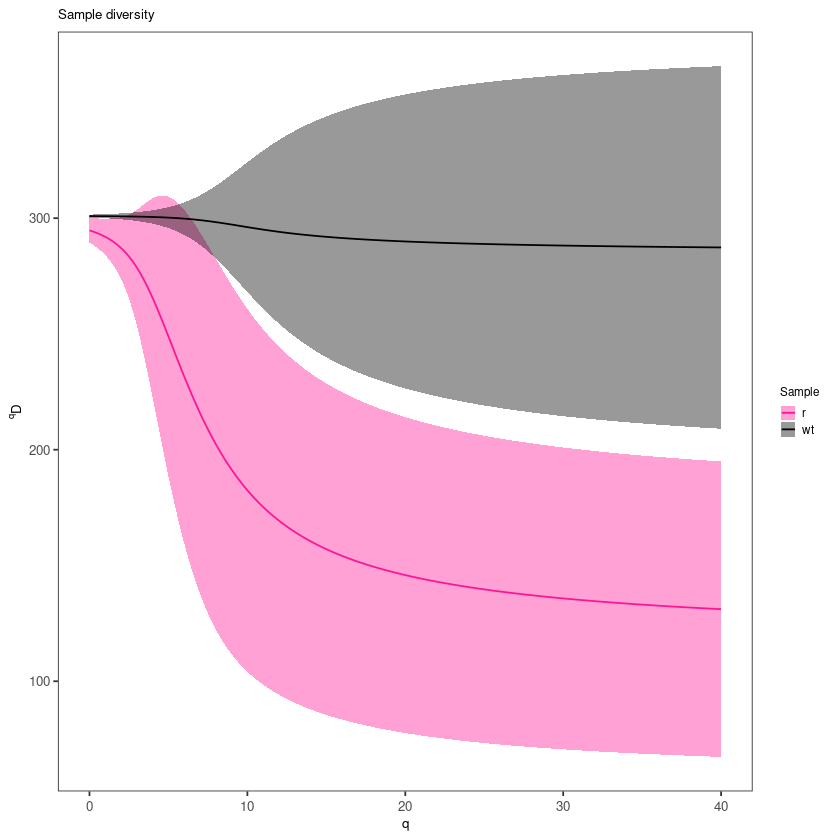

In [11]:
### Generating a diversity curve based on either samples or isotypes.

# 1. Using samples.
# Compare diversity curve across values in the "sample" column
# q ranges from 0 (min_q=0) to 4 (max_q=4) in 0.05 increments (step_q=0.05)
# A 95% confidence interval will be calculated (ci=0.95)
# 200 resampling realizations are performed (nboot=200)
sample_curve <- alphaDiversity(clones, group="sample_id", clone="clone_id",
                               min_q=0, max_q=40, step_q=0.1,
                               ci=0.95, nboot=200)

# Plot a log-log (log_q=TRUE, log_d=TRUE) plot of sample diversity
# Indicate number of sequences resampled from each group in the title
sample_main <- paste0("Sample diversity")
sample_colors <- c("r"="deeppink1", "wt"="black")
plot(sample_curve, colors=sample_colors, main_title=sample_main, 
     legend_title="Sample")

In [12]:
# Test diversity at q=0, q=1 and q=2 (equivalent to species richness, Shannon entropy, 
# Simpson's index) across values in the sample_id column
# 200 bootstrap realizations are performed (nboot=200)
isotype_test <- alphaDiversity(clones, group=("c_call"), min_q=0, max_q=4, step_q=1, nboot=200, clone="clone_id")

# Print P-value table
print(isotype_test@tests)

Warning message in estimateAbundance(data, ci = 0.95, ...):
“Not all groups passed threshold min_n=30. Excluded: IGHA, IGHG1, IGHG3”


# A tibble: 15 x 5
   test             q     delta_mean delta_sd pvalue
   <chr>            <chr>      <dbl>    <dbl>  <dbl>
 1 IGHD != IGHG2B   0          1.00     1.01    0.7 
 2 IGHD != IGHG2B   1          1.35     1.33    0.7 
 3 IGHD != IGHG2B   2          1.84     1.78    0.7 
 4 IGHD != IGHG2B   3          2.50     2.36    0.7 
 5 IGHD != IGHG2B   4          3.33     3.00    0.7 
 6 IGHD != IGHG2C   0          0.37     0.629   0.61
 7 IGHD != IGHG2C   1          0.499    0.840   0.61
 8 IGHD != IGHG2C   2          0.686    1.14    0.61
 9 IGHD != IGHG2C   3          0.949    1.54    0.61
10 IGHD != IGHG2C   4          1.30     2.07    0.61
11 IGHG2B != IGHG2C 0          0.635    1.12    0.99
12 IGHG2B != IGHG2C 1          0.851    1.48    0.99
13 IGHG2B != IGHG2C 2          1.15     1.99    0.99
14 IGHG2B != IGHG2C 3          1.55     2.64    0.99
15 IGHG2B != IGHG2C 4          2.03     3.39    0.99


Warning message:
“Removed 2 rows containing missing values (geom_point).”


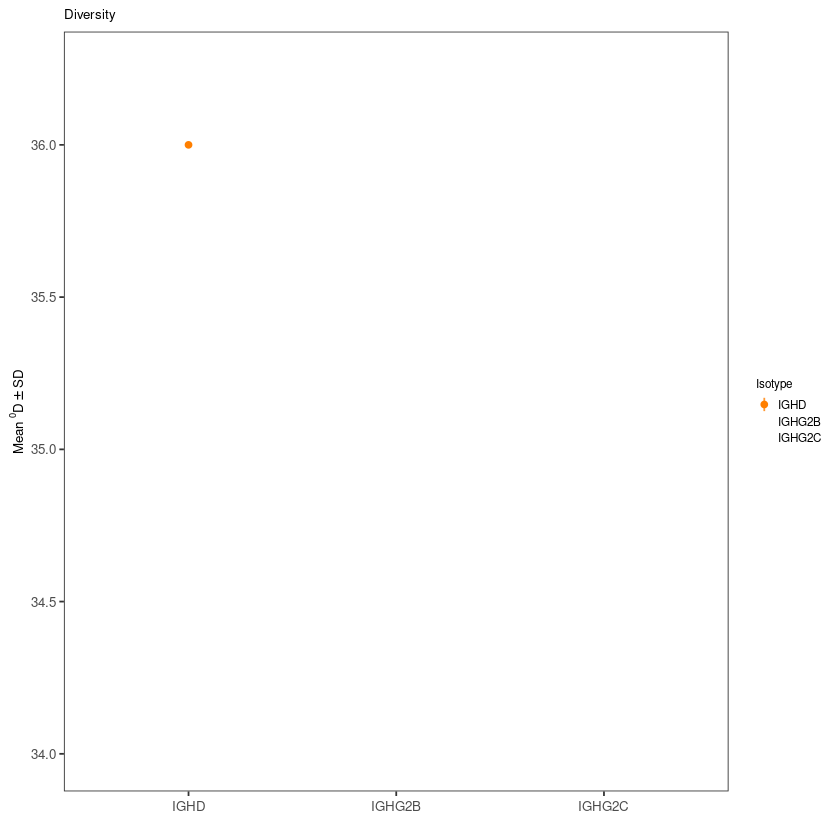

In [13]:
# Plot results at q=0
# Plot the mean and standard deviations at q=0 and q=2
plot(isotype_test, 0, colors=IG_COLORS, legend_title="Isotype")

Warning message:
“Removed 2 rows containing missing values (geom_point).”


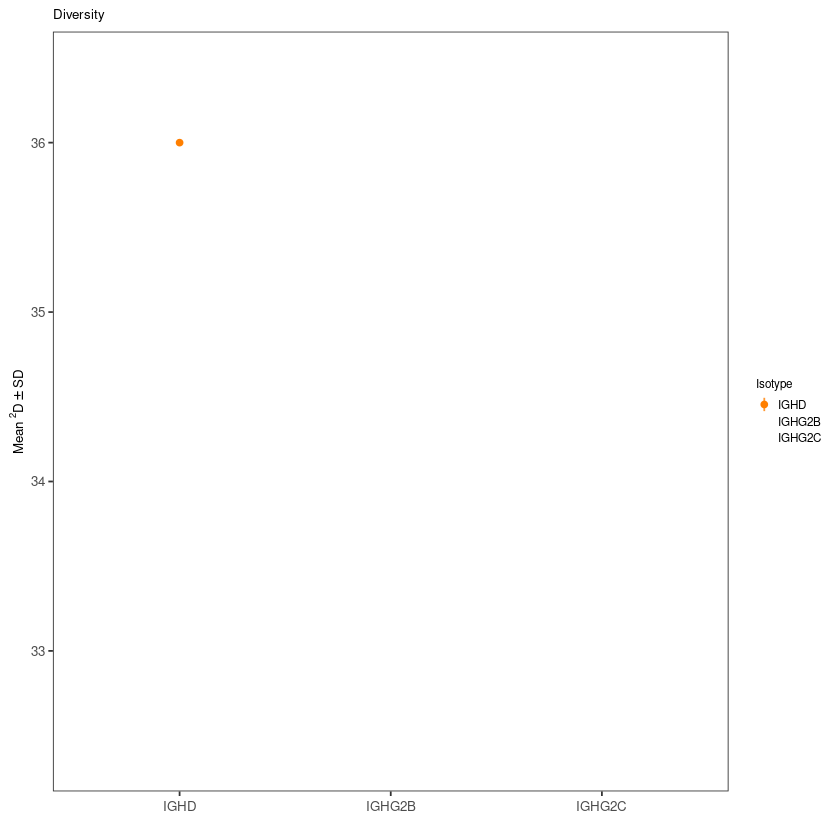

In [14]:
# Plot results at q=2
# Plot the mean and standard deviations at q=0 and q=2
plot(isotype_test, 2, colors=IG_COLORS, legend_title="Isotype")